## Basic Cheminformatics!
### Aims: 
* Introduce **PuChemPy**: a python package that neatly handles requests to the PubChem database. For more info, see the [docs](https://pubchempy.readthedocs.io/en/latest/)
* Introduce [RDKit](https://www.rdkit.org/), a powerful and open source chemistry module that has become an industry standard. To get started check out the [cookbook](https://www.rdkit.org/docs/GettingStartedInPython.html)
* Introduce [Py3Dmol](https://3dmol.csb.pitt.edu/) for interactive, 3D molecule and protein visualization.

### Data
This week we're looking at therapies for COVID-19 that are currently in clinical trials. We start with a link in the [NCBI SARS-CoV2 page](https://www.ncbi.nlm.nih.gov/genbank/sars-cov-2-seqs/) to find a list of compound IDs, and will work on physicochemical descriptors and rendering the compound.

### Extra Learning Outcomes:
* Package installation - conda vs pip
* Progress bars for long loops
* Some Data manipulation in pandas
* **List Comprehension**: squeezing a ```for```  loop into a list, which is a huge convenience.
* Tricky installs on Colab 
* A really brief introduction to [seaborn](https://seaborn.pydata.org/), an extension to the ```matplotlib.pyplot``` library with lots of extra useful functions.


### Learning Resources:
* [PubChemPy docs](https://pubchempy.readthedocs.io/en/latest/)
* [Py3Dmol jupyter notebook](https://nbviewer.jupyter.org/github/3dmol/3Dmol.js/blob/9050b97144e81f065df7eecc87ba9a16723ab14b/py3Dmol/examples.ipynb) full of useful examples.
* [RDkit Examples](https://www.rdkit.org/docs/GettingStartedInPython.html) from the official site.
* [iwatobipen's RDKit blog posts](https://iwatobipen.wordpress.com/), which are full of useful examples of RDKit scripts, from a proffessional Cheminformatician.

In [1]:
! pip install PubChemPy # Escape python to the BASH terminal with the '!', install PubChemPy using the pip package manager

  Created wheel for PubChemPy: filename=PubChemPy-1.0.4-cp36-none-any.whl size=13825 sha256=2cdcc89b041126bf8a631700b0008847b41df00698bb6b6196e3ac8b99aab733
  Stored in directory: /root/.cache/pip/wheels/10/4d/51/6b843681a9a5aef35f0d0fbce243de46f85080036e16118752
Successfully built PubChemPy


In [0]:
import pubchempy as pcp
# docs https://pubchempy.readthedocs.io/en/latest/

cpd_ids = [6167,447043,46780910,3034756,5479530,5281004,4594,123805,137254326,
 135565962,131411,3083544,5284360,121304016,135413523,133112890,
 11979606,64927,3961,145068,10445549,73078,3672,6741,5702220,129009998,
 63006,492405,2973,23994,11980957,5426,5702148,24867460,2462,18647121,
 23724843,25126798,60846,54670067,962,60823,9875401,3410,2244,44205240,
 3652,2719,3033890,123683,5754,40000,65028,4740,12035,5280795,12947,
 9916461,5743,16759566,16130571,122361610,9926791,5793,139595263,60606,
 117072410,107970,37542,392622,6338,73759663]

# I got this via the https://www.ncbi.nlm.nih.gov/genbank/sars-cov-2-seqs/ clinical trails link

cpds = pcp.get_compounds(cpd_ids) # make request to the database

In [3]:
from tqdm import tqdm # progress bar

names = []
for i in tqdm(cpds):
    n = i.synonyms # makes new request, so it's slow
    if n != []:
        names.append(n[0])
    else:
        names.append('?') # placeholder, in case of failure to get name
names

100%|██████████| 72/72 [00:18<00:00,  3.95it/s]


['colchicine',
 'azithromycin',
 '51333-22-3',
 '(S,S)-Formoterol',
 'ceftriaxone',
 'budesonide',
 'omeprazole',
 'Angiotensin (1-7)',
 'Ifx-1',
 'STA-1474',
 'Arbidol',
 'Arformoterol',
 'camostat mesilate',
 '1809249-37-3',
 'Sildenafil citrate',
 '?',
 'Lopinavir/Ritonavir',
 'Chloroquine diphosphate',
 'losartan',
 'nitric oxide',
 'Galidesivir',
 'tetrandrine',
 'ibuprofen',
 'methylprednisolone',
 'Bromhexine hydrochloride',
 'SW219984-1',
 '(22S)-BUDESONIDE',
 'Favipiravir',
 'deferoxamine',
 '7440-66-6',
 'LPV/r',
 'thalidomide',
 'Spectrum2_000623',
 'CHEMBL1434334',
 'Pulmicort',
 'S-1320',
 'Tazocin (TN)',
 'Ruxolitinib',
 'valsartan',
 'l-ascorbic acid',
 'water',
 'atorvastatin',
 'Rivaroxaban',
 'formoterol',
 'aspirin',
 'Baricitinib',
 'hydroxychloroquine',
 'chloroquine',
 '51333-22-3',
 'IB-MECA',
 'hydrocortisone',
 'Dexbudesonide',
 'oseltamivir',
 'pentoxifylline',
 'N-Acetyl-L-cysteine',
 'Vitamin D3',
 'HYDROXYCHLOROQUINE SULFATE',
 'Tradipitant',
 'dexamethason

In [4]:
cpds[0].to_dict().keys() # I want to extract some properties from each 'Compound' object
# dictionaries are a convenient way to do this, AND they're compatible with pandas dataframes

dict_keys(['atom_stereo_count', 'atoms', 'bond_stereo_count', 'bonds', 'cactvs_fingerprint', 'canonical_smiles', 'charge', 'cid', 'complexity', 'conformer_id_3d', 'conformer_rmsd_3d', 'coordinate_type', 'covalent_unit_count', 'defined_atom_stereo_count', 'defined_bond_stereo_count', 'effective_rotor_count_3d', 'elements', 'exact_mass', 'feature_selfoverlap_3d', 'fingerprint', 'h_bond_acceptor_count', 'h_bond_donor_count', 'heavy_atom_count', 'inchi', 'inchikey', 'isomeric_smiles', 'isotope_atom_count', 'iupac_name', 'mmff94_energy_3d', 'mmff94_partial_charges_3d', 'molecular_formula', 'molecular_weight', 'monoisotopic_mass', 'multipoles_3d', 'pharmacophore_features_3d', 'record', 'rotatable_bond_count', 'shape_fingerprint_3d', 'shape_selfoverlap_3d', 'tpsa', 'undefined_atom_stereo_count', 'undefined_bond_stereo_count', 'volume_3d', 'xlogp'])

In [5]:
cpds[0].to_dict(properties = ['canonical_smiles',
                              'iupac_name',
                             'exact_mass',
                             'h_bond_acceptor_count',
                              'h_bond_donor_count',
                             'heavy_atom_count',
                             'xlogp'])

# The 'properties' argument lets me narrow my selection

{'canonical_smiles': 'CC(=O)NC1CCC2=CC(=C(C(=C2C3=CC=C(C(=O)C=C13)OC)OC)OC)OC',
 'exact_mass': 399.16818753,
 'h_bond_acceptor_count': 6,
 'h_bond_donor_count': 1,
 'heavy_atom_count': 29,
 'iupac_name': 'N-[(7S)-1,2,3,10-tetramethoxy-9-oxo-6,7-dihydro-5H-benzo[a]heptalen-7-yl]acetamide',
 'xlogp': 1}

In [6]:
import pandas as pd

#list comprehensions are a way to squeeze a 'for' loop into a list
# The advantage of this is that you can fit the list into a single line (except in this case, where I've spread it out for readability)
# the loop is exactly equivalent to:

#properties = []
#for i in cpds:
#    data = i.to_dict(properties = ['canonical_smiles','iupac_name', 'exact_mass','h_bond_acceptor_count',
#                              'h_bond_donor_count', 'heavy_atom_count', 'xlogp']
#    properties.append(data)
                     
properties = [i.to_dict(properties = ['canonical_smiles','iupac_name', 'exact_mass','h_bond_acceptor_count',
                              'h_bond_donor_count', 'heavy_atom_count', 'xlogp']) for i in cpds]


df = pd.DataFrame(properties) # pandas detects dictionary keys as column headers
df['Names'] = pd.Series(names) # We can define a new column, 'Names', as a pandas Series object (single column)
df.head()

,canonical_smiles,iupac_name,exact_mass,h_bond_acceptor_count,h_bond_donor_count,heavy_atom_count,xlogp,Names
0,CC(=O)NC1CCC2=CC(=C(C(=C2C3=CC=C(C(=O)C=C13)OC...,"N-[(7S)-1,2,3,10-tetramethoxy-9-oxo-6,7-dihydr...",399.168188,6,1,29,1.0,colchicine
1,CCC1C(C(C(N(CC(CC(C(C(C(C(C(=O)O1)C)OC2CC(C(C(...,"(2R,3S,4R,5R,8R,10R,11R,12S,13S,14R)-11-[(2S,3...",748.508526,14,5,52,4.0,azithromycin
2,CCCC1OC2CC3C4CCC5=CC(=O)C=CC5(C4C(CC3(C2(O1)C(...,"(1S,9S,11S,13R)-11-hydroxy-8-(2-hydroxyacetyl)...",430.235539,6,2,31,2.5,51333-22-3
3,CC(CC1=CC=C(C=C1)OC)NCC(C2=CC(=C(C=C2)O)NC=O)O,N-[2-hydroxy-5-[(1S)-1-hydroxy-2-[[(2S)-1-(4-m...,344.173607,5,4,25,1.8,"(S,S)-Formoterol"
4,CN1C(=NC(=O)C(=O)N1)SCC2=C(N3C(C(C3=O)NC(=O)C(...,"(6R,7R)-7-[[(2Z)-2-(2-amino-1,3-thiazol-4-yl)-...",554.046058,13,4,36,-1.3,ceftriaxone


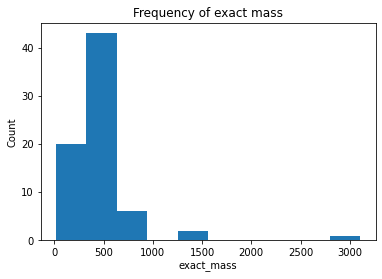

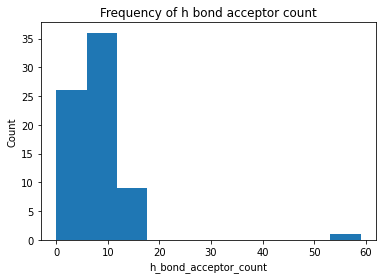

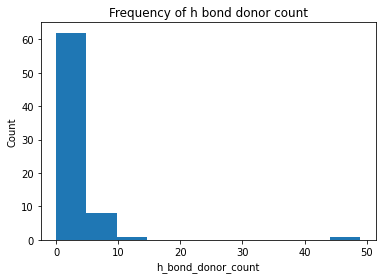

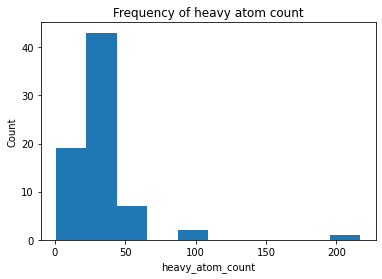

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


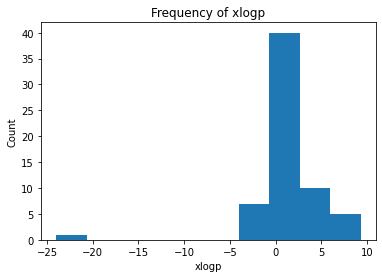

In [7]:
import matplotlib.pyplot as plt

lipinski_properties = ['exact_mass',
       'h_bond_acceptor_count', 'h_bond_donor_count', 'heavy_atom_count',
       'xlogp'] # these are the column header that I want to plot

for i in lipinski_properties:
    col = df.loc[:,i] # locate the column of interest based on its header
    plt.hist(col) # plot a histogram of it. No extra arguments to plt.hist() means it will be the default format
    # extra arguments like 'alpha = 0.8' or 'color = 'orange' or 'bins = 10' can spruce it up
    plt.title(f'Frequency of {i}'.replace('_',' '))
    # That's an 'fstring', which is prefixed by an f. variables can be dropped in using hte {curly brackets}
    # I've alse replaced the underscores with spaces using .replace(..)
    plt.ylabel('Count')
    plt.xlabel(i)
    plt.show() # plt.show is called within the loop so the plot is rendered with each pass
    # if the command were outside fo the loop, the plots would be stacked and the axes would be overwritten in each pass

In [8]:
# there's an outlier in there
# we can find the index of it by using the .idxmax() of a column
# in this case i'll find the max mass
# this returns the row index, which i'll then give the the .loc[rows,columns] functions
# to get my row
df.loc[df['exact_mass'].idxmax(),:] 

canonical_smiles         CCC(C)C(C(=O)NC(C(C)O)C(=O)NC(C(C)O)C(=O)NC(CC...
iupac_name               (4S)-4-[[(2S)-2-[[(2S)-2-[[(2S)-2-[[(2S)-2-[[(...
exact_mass                                                         3107.51
h_bond_acceptor_count                                                   59
h_bond_donor_count                                                      49
heavy_atom_count                                                       217
xlogp                                                                  -24
Names                                                          Thymalfasin
Name: 60, dtype: object

In [9]:
!pip install py3Dmol

In [10]:
import py3Dmol
# https://nbviewer.jupyter.org/github/3dmol/3Dmol.js/blob/9050b97144e81f065df7eecc87ba9a16723ab14b/py3Dmol/examples.ipynb
# Each function returns adds features to the 'view' object
# The underlying code is javascript, so the syntax is different from what we'e used to
# but with a little ctrl+c from the link above, we can make a decent plot
view = py3Dmol.view(query='pdb:2MNQ')
view.setStyle({'cartoon':{'color':'spectrum'}}) 
view.addSurface(py3Dmol.VDW,{'opacity':0.7,'color':'white'})
view

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

## Part 2: **RDKit**
RDKit is mostly written in C++, and pip can only install packages written in python. 
Luckily, ```conda``` can install non-python packages.

* To install rdkit on your local machine, run: ```conda install -c rdkit rdkit``` in your command line or using a cell prefixed with ```!``` to escape python and access the command line.

* Colab doesn't have conda installed, so we'll do some magic to get it, then install rdkit. This example is stolen from this [blog post](https://iwatobipen.wordpress.com/2018/11/01/run-rdkit-and-deep-learning-on-google-colab-rdkit/) 

In [11]:
!wget -c https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh # download miniconda
!chmod +x Miniconda3-latest-Linux-x86_64.sh # make it executable
!bash ./Miniconda3-latest-Linux-x86_64.sh -b -f -p /usr/local # run miniconda
!conda install -c rdkit rdkit -y # install rdkit

--2020-04-30 07:27:37--  https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.continuum.io (repo.continuum.io)... 104.18.201.79, 104.18.200.79, 2606:4700::6812:c94f, ...
Connecting to repo.continuum.io (repo.continuum.io)|104.18.201.79|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh [following]
--2020-04-30 07:27:37--  https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-latest-Linux-x86_64.sh’

Miniconda3-latest-L 100%[===================>]  81.12M   187MB/s    in 0.4s    

2020-04-30 07:27:38 (187 MB/s) - ‘Miniconda3-latest-Linux

In [14]:
# lets get some FDA approved drugs and compare them to the covid-19 trial therapies
fda_approved = pd.read_csv('https://raw.githubusercontent.com/samoturk/openmolDB/master/demo_table.csv')
fda_approved.head()

,name,supplier,supplierid,smiles,molclass,amount,unit,platebarcode,samplebarcode
0,ZINC00000018,eMolecules,1406678,CC(C)C[C@@H]1C(=O)N(C(=S)N1)CC=C,hts,1,mg,x1,10000001
1,ZINC00000023,MicroSource Pharmakon,02300166,CC(C)[NH2+]C[C@H](COc1ccccc1CC=C)O,hts,2,mg,x1,10000002
2,ZINC00000036,TCI,M0038,c1ccc(cc1)[C@@H](C(=O)[O-])O,hts,3,mg,x1,10000003
3,ZINC00000053,FineTech,FT-0602931,CC(=O)Oc1ccccc1C(=O)[O-],hts,4,mg,x1,10000004
4,ZINC00000056,BroadPharm,BP-12856,C[NH+]1[C@@H]2CC[C@H]1CC(C2)OC(=O)[C@H](CO)c3c...,hts,5,mg,x1,10000005


In [15]:
import sys # system commands
# add the folder containing the conda installs (rdkit) to the python path,
# this way the interpreter knows where to look for rdkit when we import it
sys.path.append('/usr/local/lib/python3.7/site-packages/')


# I'll only import the modules I'll use today
from rdkit import Chem
from rdkit.Chem import AllChem # child modules aren't imported automatically
from rdkit.Chem import Lipinski, Descriptors

fda_mols = [Chem.MolFromSmiles(i) for i in fda_approved['smiles']] # make 'mol' objects for each smiles code using a list comprehension
fda_mols = [Chem.AddHs(i) for i in fda_mols if not None] # add hydrogens, which are implicit in smiles codes
# this list comprehension also contains a logic statement 'if not None' to handle erors
# logic statements come last in list comprehensions

# Let's calculate some properties
hbondacc = [Lipinski.NumHAcceptors(i) for i in fda_mols]
hbonddon = [Lipinski.NumHDonors(i) for i in fda_mols]
logp = [Chem.Descriptors.MolLogP(i) for i in fda_mols]
molwt = [AllChem.CalcExactMolWt(i)for i in fda_mols ]

# And put them into a dataframe
fda_df = pd.DataFrame([hbondacc,hbonddon,logp, molwt], index = ['NumHAcceptors','NumHDonors','MolLogP','MolWt']).T
# .T means transpose, I did this because I was having trouble getting the dataframe to play ball
fda_df.head()

,NumHAcceptors,NumHDonors,MolLogP,MolWt
0,2.0,1.0,1.3038,212.098334
1,2.0,2.0,1.1266,250.180155
2,3.0,1.0,-0.5301,151.040068
3,4.0,0.0,-0.0246,179.034982
4,3.0,2.0,0.5138,290.175070


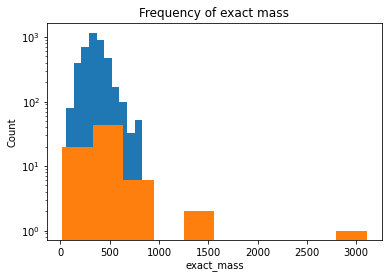

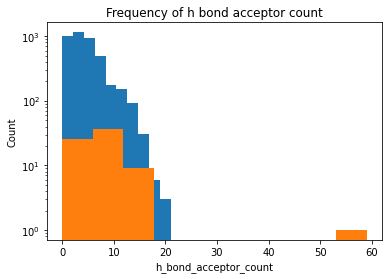

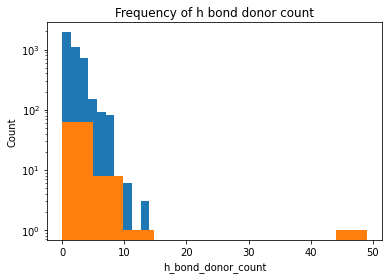

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


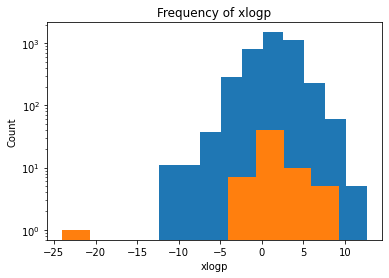

In [16]:
fda_lipinski_props = {'exact_mass':molwt,
       'h_bond_acceptor_count':hbondacc, 
                      'h_bond_donor_count':hbonddon, 
       'xlogp':logp}

# similar loop to before
# except I've made a dictionary where each key corresponds to the lists (made by the comprehension statements above)
# which was a quick and dirty way to access 2 different objects in each pass of the loop

for i in fda_lipinski_props:
    col = df.loc[:,i]
    fda_data = fda_lipinski_props[i]
    plt.hist(fda_data)
    plt.hist(col) # plots on top of the previous histogram
    plt.title(f'Frequency of {i}'.replace('_',' '))
    plt.ylabel('Count')
    plt.xlabel(i)
    plt.yscale('log')
    plt.show()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


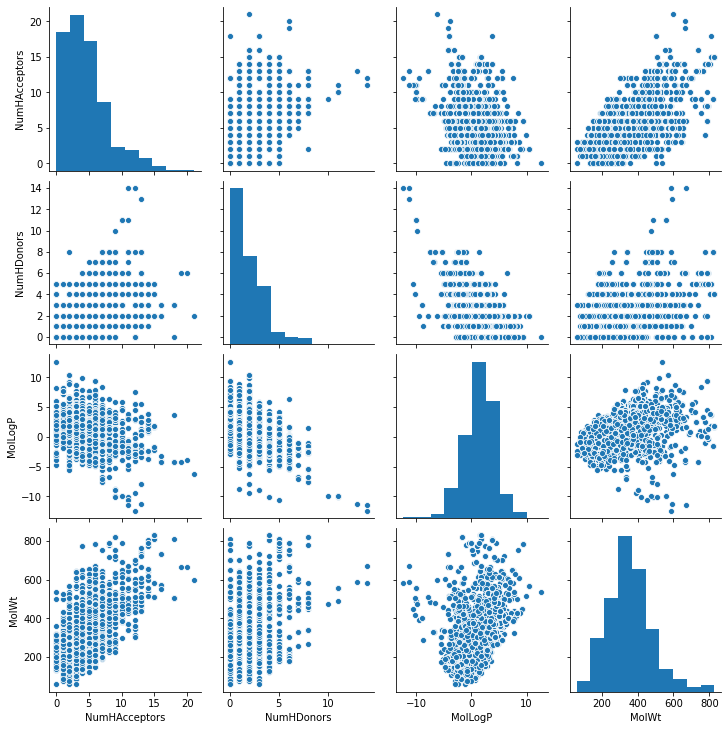

In [17]:
import seaborn as sns
# seaborn is an extension of matplotlib.pyplot with some really useful features
# see the docs here: https://seaborn.pydata.org/

# the pairplot plots everything against everything as scatter plots and histograms in a 
# convenient grid
sns.pairplot(fda_df)
plt.show()

CC(=O)NC1CCC2=CC(=C(C(=C2C3=CC=C(C(=O)C=C13)OC)OC)OC)OC


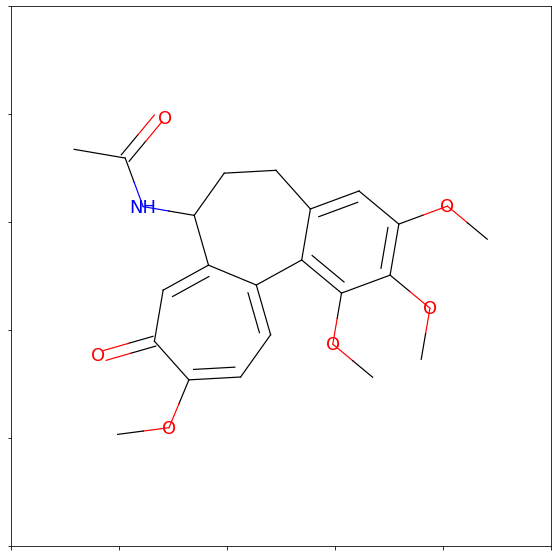

In [19]:
from rdkit.Chem import Draw
# import the Draw modue to render some compounds

covid_drugs = [Chem.MolFromSmiles(i) for i in df['canonical_smiles']]
# generate 'mol' objects fom each of the smiles
print(df['canonical_smiles'][0])
m = Draw.MolToMPL(covid_drugs[0]) # returns a matplotlib.pyplot object
m.show()  #.plt syntax

,Mol,Names,exact_mass,h_bond_acceptor_count,h_bond_donor_count,heavy_atom_count,xlogp
0,,colchicine,399.168188,6,1,29,1.0
1,,azithromycin,748.508526,14,5,52,4.0
2,,51333-22-3,430.235539,6,2,31,2.5
3,,"(S,S)-Formoterol",344.173607,5,4,25,1.8
4,,ceftriaxone,554.046058,13,4,36,-1.3
...,...,...,...,...,...,...,...
67,,Fingolimod,307.251129,3,3,22,4.2
68,,ribavirin,244.080770,7,4,17,-1.8
69,,ritonavir,720.312761,9,4,50,6.0
70,,VINYL CHLORIDE,61.992328,0,0,3,1.5

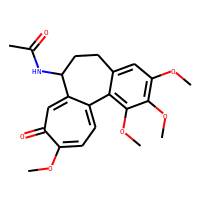
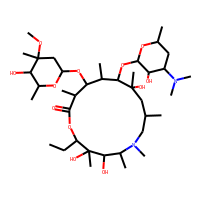
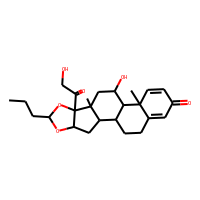
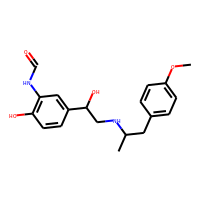
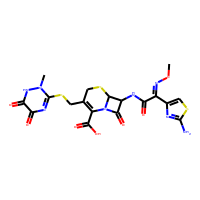
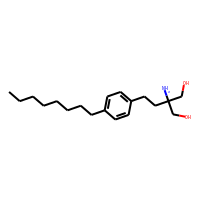
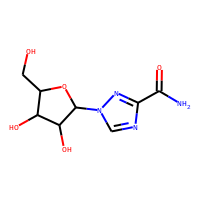
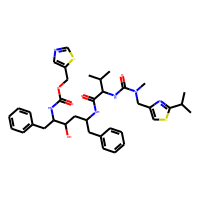
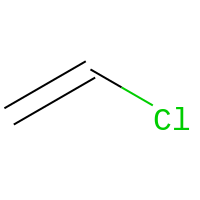
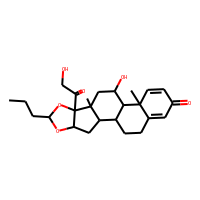

In [24]:
from rdkit.Chem import PandasTools

# PandasTools is a very practical way to add an rdkit mol object to a column of a dataframe
# and also auto-renders!
# The function updates the dataframe inplace
# arges(dataframe, smilesCol='..', molCol='whatever you want')
PandasTools.AddMoleculeColumnToFrame(df, smilesCol = 'canonical_smiles',molCol='Mol')
df[['Mol','Names','exact_mass','h_bond_acceptor_count','h_bond_donor_count','heavy_atom_count','xlogp']]